## Setting directory and loading packages

In [2]:
import pandas as pd
import os # use this to access your environment variables
import numpy as np
import statsmodels.api as sm
# For matplotlib
import matplotlib.pyplot as plt
# For seaborn
import seaborn as sns

from scipy.stats import f_oneway

In [3]:
os.chdir("C:/Users/Laven/Documents/Data_Analysis/Capstone_Project/")

## Loading Data Frames


In [8]:
bars_and_restaurants_df_no_duplicates_utf8 = pd.read_csv('bars_and_restaurants_df_no_duplicates_utf8.csv')


In [10]:
bars_in_montreal_collected_unique_utf8 = pd.read_csv('bars_in_montreal_collected_unique_utf8.csv')

In [11]:
bars_in_montreal_collected_unique_utf8

,Name,Address,Latitude,Longitude,Rating,Price Level,Geohash
0,Pub St-Paul,"124 Rue Saint-Paul E, Montréal, QC H2Y 1G6",45.506944,-73.552500,3.9,2.0,f25dy
1,Piranha Bar,"680 Saint-Catherine St W, Montreal, Quebec H3B...",45.502852,-73.569942,4.1,1.0,f25dv
2,Patrick's Pub,"1707 Saint Denis St, Montreal, Quebec H2X 3K4",45.515570,-73.564079,4.2,2.0,f25dy
3,MVP Resto-Bar Sportif,"200 St Catherine St E, Montreal, Quebec H2X 1L1",45.511730,-73.561981,3.8,2.0,f25dy
4,Pub John Michaels,"458 Pl. Jacques-Cartier, Montréal, QC H2Y 3Z2",45.508011,-73.553953,4.0,2.0,f25dy
...,...,...,...,...,...,...,...
518,M Resto-Bar,"3625 Rue Talon, Sainte-Catherine, QC J5C 1T7",45.387405,-73.553055,4.4,2.0,f25dn
519,BLVD Bar & Gril,"100 Rue Kepler, Châteauguay, QC J6K 2X9",45.360540,-73.712815,4.5,2.0,f25d4
520,Barbossa,"3956 A St Laurent Blvd, Montreal, Quebec H2W 1Y3",45.516651,-73.578985,4.1,2.0,f25dv
521,KARAOKE BAR 3 MINOTS,"3812 St Laurent Blvd, Montreal, Quebec H2W 1X6",45.515533,-73.576472,3.4,1.0,f25dv


In [12]:
restaurants_in_montreal_collected_unique_utf8 = pd.read_csv('restaurants_in_montreal_collected_unique_utf8.csv')

In [13]:
restaurants_in_montreal_collected_unique_utf8

,Name,Address,Latitude,Longitude,Rating,Price Level,Geohash
0,Restaurant Branzino,"50 René-Lévesque Blvd W, Montreal, Quebec H2Z 1A2",45.508147,-73.561650,3.9,NaN,f25dy
1,Bar et Restaurant La Catrina - Vieux-Port,"119 De la Commune St W, Montreal, Quebec H2Y 2C7",45.503820,-73.553983,4.1,2.0,f25dy
2,COMMODORE restaurant Montréal,"355 Blvd. De Maisonneuve Ouest, Montreal, Queb...",45.507151,-73.569114,3.9,NaN,f25dv
3,Restaurant Keung Kee,"70 Rue De la Gauchetière O, Montréal, QC H2Z 1C1",45.507253,-73.560407,3.9,2.0,f25dy
4,Beijing Restaurant,"92 Rue De la Gauchetière O, Montréal, QC H2Z 1C1",45.506930,-73.560560,4.1,2.0,f25dy
...,...,...,...,...,...,...,...
2767,Les Enfants Terribles — Outremont,"1257 Bernard Ave, Outremont, Quebec H2V 1V8",45.519924,-73.609135,3.9,3.0,f25du
2768,Pho Bep Cuisine Vietnamienne,"102 Rue Saint-Viateur O, Montréal, QC H2T 2L1",45.524414,-73.600046,4.5,NaN,f25dv
2769,Yuukai sushi,"5407 Park Ave, Montreal, Quebec H2V 4G9",45.522069,-73.601220,4.5,2.0,f25dv
2770,Pizzeria Magpie Mile End,"16 Maguire St, Montreal, Quebec H2T 1B8",45.524703,-73.595522,4.4,2.0,f25dv


In [14]:
montreal_transport_stations = pd.read_csv('montreal_transport_stations.csv')


In [15]:
montreal_all_rail_stations = pd.read_csv('montreal_all_rail_stations.csv')

## Defining Functions To Calculate Distance

In [17]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    r = 6371 # Radius of earth in kilometers
    return c * r

In [18]:
def find_closest_points(list1, list2):
    closest_points = []
    for lat1, lon1 in list1:
        min_distance = float('inf')
        closest_point = None
        for lat2, lon2 in list2:
            distance = haversine(lon1, lat1, lon2, lat2)
            if distance < min_distance:
                min_distance = distance
                closest_point = (lat2, lon2)
        closest_points.append(((lat1, lon1), closest_point, min_distance))
    return closest_points

In [ ]:
def count_nearby_stations(establishment_coords, station_coords, max_distance = 1):
    # This will hold the count of nearby stations for each establishment
    nearby_stations_count = []
    
    for est in establishment_coords:
        count = 0
        for station in station_coords:
            distance = haversine(est[1], est[0], station[1], station[0])
            if distance <= max_distance:
                count += 1
        nearby_stations_count.append(count)
        
    return nearby_stations_count

In [19]:
bars_and_restaurants_df_no_duplicates_utf8

,Name,Address,Latitude,Longitude,Rating,Price Level,Geohash,Type
0,Pub St-Paul,"124 Rue Saint-Paul E, Montréal, QC H2Y 1G6",45.506944,-73.552500,3.9,2.0,f25dy,Bar
1,Piranha Bar,"680 Saint-Catherine St W, Montreal, Quebec H3B...",45.502852,-73.569942,4.1,1.0,f25dv,Bar
2,Patrick's Pub,"1707 Saint Denis St, Montreal, Quebec H2X 3K4",45.515570,-73.564079,4.2,2.0,f25dy,Bar
3,MVP Resto-Bar Sportif,"200 St Catherine St E, Montreal, Quebec H2X 1L1",45.511730,-73.561981,3.8,2.0,f25dy,Bar
4,Pub John Michaels,"458 Pl. Jacques-Cartier, Montréal, QC H2Y 3Z2",45.508011,-73.553953,4.0,2.0,f25dy,Bar
...,...,...,...,...,...,...,...,...
3186,Les Enfants Terribles — Outremont,"1257 Bernard Ave, Outremont, Quebec H2V 1V8",45.519924,-73.609135,3.9,3.0,f25du,Restaurant
3187,Pho Bep Cuisine Vietnamienne,"102 Rue Saint-Viateur O, Montréal, QC H2T 2L1",45.524414,-73.600046,4.5,NaN,f25dv,Restaurant
3188,Yuukai sushi,"5407 Park Ave, Montreal, Quebec H2V 4G9",45.522069,-73.601220,4.5,2.0,f25dv,Restaurant
3189,Pizzeria Magpie Mile End,"16 Maguire St, Montreal, Quebec H2T 1B8",45.524703,-73.595522,4.4,2.0,f25dv,Restaurant


In [20]:
montreal_transport_stations



,station_id,num_bikes_available,Name,Latitude,Longitude,Geohash,Type,Address
0,1.0,12.0,Métro Champ-de-Mars (Viger / Sanguinet),45.510253,-73.556777,f25dy,Citybike,NaN
1,3.0,5.0,Clark / Ontario,45.510599,-73.566925,f25dv,Citybike,NaN
2,11.0,11.0,de la Porte de Québec / St-André,45.513294,-73.550578,f25dy,Citybike,NaN
3,15.0,8.0,St-Denis / de Maisonneuve,45.514339,-73.561685,f25dy,Citybike,NaN
4,19.0,2.0,Métro Sherbrooke (de Rigaud / Berri),45.518143,-73.568004,f25dv,Citybike,NaN
...,...,...,...,...,...,...,...,...
267,NaN,NaN,VIA Rail Canada,45.500165,-73.565964,f25dv,Light Rail,"895 Rue E, Montréal, QC H3B 2M4, Canada"
268,NaN,NaN,Bois-Franc,45.522995,-73.709627,f25df,Light Rail,"5465 Henri Bourassa Blvd W, Saint-Laurent, Que..."
269,NaN,NaN,Station Du Quartier,45.446857,-73.433517,f25f8,Light Rail,"Brossard, QC, Canada"
270,NaN,NaN,Roxboro-Pierrefonds,45.509196,-73.809225,f25db,Light Rail,"Dollard-Des Ormeaux, Quebec H8Y 2M2, Canada"


## Getting my lists of coordinate tuples


In [ ]:

establishments_coords = list(zip(bars_and_restaurants_df_no_duplicates_utf8['Latitude'], bars_and_restaurants_df_no_duplicates_utf8['Longitude']))
transport_stations_coords = list(zip(montreal_transport_stations['Latitude'], montreal_transport_stations['Longitude']))



In [22]:
rail_coordinates =list(zip(montreal_all_rail_stations['Latitude'], montreal_all_rail_stations['Longitude']))


In [23]:
bars_coords = list(zip(bars_in_montreal_collected_unique_utf8['Latitude'], bars_in_montreal_collected_unique_utf8['Longitude']))

In [24]:
restaurant_coords = list(zip(restaurants_in_montreal_collected_unique_utf8['Latitude'], restaurants_in_montreal_collected_unique_utf8['Longitude']))

In [25]:
bars_coords

[(45.5069444, -73.5525),
 (45.5028519, -73.5699419),
 (45.51557, -73.5640791),
 (45.5117302, -73.5619812),
 (45.508011, -73.553953),
 (45.4994033, -73.5719425),
 (45.5083265, -73.560176),
 (45.5093984, -73.5513861),
 (45.5102747, -73.575045),
 (45.5030083, -73.5686463),
 (45.4995305, -73.5721343),
 (45.5037304, -73.5548612),
 (45.5173012, -73.5564792),
 (45.5145904, -73.5743638),
 (45.5135005, -73.5727198),
 (45.506032, -73.566683),
 (45.4990443, -73.5757779),
 (45.5020783, -73.5621662),
 (45.521809, -73.577784),
 (45.497962, -73.576909),
 (45.4979112, -73.5768909),
 (45.5000038, -73.5600419),
 (45.5185651, -73.5558892),
 (45.5187982, -73.5597079),
 (45.5006112, -73.5715384),
 (45.5070202, -73.5532857),
 (45.5162155, -73.5656688),
 (45.502519, -73.5744113),
 (45.5020663, -73.5760159),
 (45.5076517, -73.5653556),
 (45.5148104, -73.5654241),
 (45.5126917, -73.5608528),
 (45.5190369, -73.5554958),
 (45.5040576, -73.5547406),
 (45.5013632, -73.5566209),
 (45.5046959, -73.5638172),
 (45.509

In [26]:
restaurant_coords

[(45.5081472, -73.5616503),
 (45.50382, -73.5539833),
 (45.5071509, -73.5691138),
 (45.507253, -73.560407),
 (45.5069299, -73.56056),
 (45.5078656, -73.56735549999999),
 (45.5103558, -73.5635719),
 (45.5069164, -73.56614619999999),
 (45.51573579999999, -73.5651376),
 (45.5156607, -73.5650071),
 (45.50707939999999, -73.5529909),
 (45.5069041, -73.5529598),
 (45.5131, -73.56088),
 (45.5071451, -73.5656769),
 (45.5035782, -73.5672884),
 (45.5079193, -73.5537918),
 (45.50666409999999, -73.5528626),
 (45.50683799999999, -73.55513909999999),
 (45.5100311, -73.56386669999999),
 (45.501517, -73.56747109999999),
 (45.5021893, -73.5554784),
 (45.5125704, -73.561618),
 (45.503998, -73.55811),
 (45.50099590000001, -73.56880799999999),
 (45.49944439999999, -73.5722222),
 (45.5013088, -73.569677),
 (45.5148022, -73.5636565),
 (45.5077179, -73.56180839999999),
 (45.5064934, -73.5530161),
 (45.5045241, -73.5589938),
 (45.5076612, -73.5710244),
 (45.5055983, -73.55682589999999),
 (45.50374900000001, -7

## Calculating Numbers Of Nearby Stations

In [28]:
bars_and_restaurants_df_no_duplicates_utf8['Nearby_Stations'] = count_nearby_stations(establishments_coords, transport_stations_coords, 1)


In [29]:
bars_and_restaurants_df_no_duplicates_utf8

,Name,Address,Latitude,Longitude,Rating,Price Level,Geohash,Type,Nearby_Stations
0,Pub St-Paul,"124 Rue Saint-Paul E, Montréal, QC H2Y 1G6",45.506944,-73.552500,3.9,2.0,f25dy,Bar,18
1,Piranha Bar,"680 Saint-Catherine St W, Montreal, Quebec H3B...",45.502852,-73.569942,4.1,1.0,f25dv,Bar,51
2,Patrick's Pub,"1707 Saint Denis St, Montreal, Quebec H2X 3K4",45.515570,-73.564079,4.2,2.0,f25dy,Bar,25
3,MVP Resto-Bar Sportif,"200 St Catherine St E, Montreal, Quebec H2X 1L1",45.511730,-73.561981,3.8,2.0,f25dy,Bar,35
4,Pub John Michaels,"458 Pl. Jacques-Cartier, Montréal, QC H2Y 3Z2",45.508011,-73.553953,4.0,2.0,f25dy,Bar,24
...,...,...,...,...,...,...,...,...,...
3186,Les Enfants Terribles — Outremont,"1257 Bernard Ave, Outremont, Quebec H2V 1V8",45.519924,-73.609135,3.9,3.0,f25du,Restaurant,3
3187,Pho Bep Cuisine Vietnamienne,"102 Rue Saint-Viateur O, Montréal, QC H2T 2L1",45.524414,-73.600046,4.5,NaN,f25dv,Restaurant,12
3188,Yuukai sushi,"5407 Park Ave, Montreal, Quebec H2V 4G9",45.522069,-73.601220,4.5,2.0,f25dv,Restaurant,8
3189,Pizzeria Magpie Mile End,"16 Maguire St, Montreal, Quebec H2T 1B8",45.524703,-73.595522,4.4,2.0,f25dv,Restaurant,16


In [30]:
bars_and_restaurants_df_no_duplicates_utf8['Nearby_Rail_Stations'] = count_nearby_stations(establishments_coords, rail_coordinates, 1)

In [31]:
bars_and_restaurants_df_no_duplicates_utf8



,Name,Address,Latitude,Longitude,Rating,Price Level,Geohash,Type,Nearby_Stations,Nearby_Rail_Stations
0,Pub St-Paul,"124 Rue Saint-Paul E, Montréal, QC H2Y 1G6",45.506944,-73.552500,3.9,2.0,f25dy,Bar,18,3
1,Piranha Bar,"680 Saint-Catherine St W, Montreal, Quebec H3B...",45.502852,-73.569942,4.1,1.0,f25dv,Bar,51,19
2,Patrick's Pub,"1707 Saint Denis St, Montreal, Quebec H2X 3K4",45.515570,-73.564079,4.2,2.0,f25dy,Bar,25,8
3,MVP Resto-Bar Sportif,"200 St Catherine St E, Montreal, Quebec H2X 1L1",45.511730,-73.561981,3.8,2.0,f25dy,Bar,35,9
4,Pub John Michaels,"458 Pl. Jacques-Cartier, Montréal, QC H2Y 3Z2",45.508011,-73.553953,4.0,2.0,f25dy,Bar,24,6
...,...,...,...,...,...,...,...,...,...,...
3186,Les Enfants Terribles — Outremont,"1257 Bernard Ave, Outremont, Quebec H2V 1V8",45.519924,-73.609135,3.9,3.0,f25du,Restaurant,3,1
3187,Pho Bep Cuisine Vietnamienne,"102 Rue Saint-Viateur O, Montréal, QC H2T 2L1",45.524414,-73.600046,4.5,NaN,f25dv,Restaurant,12,1
3188,Yuukai sushi,"5407 Park Ave, Montreal, Quebec H2V 4G9",45.522069,-73.601220,4.5,2.0,f25dv,Restaurant,8,0
3189,Pizzeria Magpie Mile End,"16 Maguire St, Montreal, Quebec H2T 1B8",45.524703,-73.595522,4.4,2.0,f25dv,Restaurant,16,2


In [32]:
bars_in_montreal_collected_unique_utf8['Nearby_Stations'] = count_nearby_stations(bars_coords, transport_stations_coords, 1)



In [33]:
bars_in_montreal_collected_unique_utf8['Nearby_Rail_Stations'] = count_nearby_stations(bars_coords, rail_coordinates, 1)


In [34]:
bars_in_montreal_collected_unique_utf8

,Name,Address,Latitude,Longitude,Rating,Price Level,Geohash,Nearby_Stations,Nearby_Rail_Stations
0,Pub St-Paul,"124 Rue Saint-Paul E, Montréal, QC H2Y 1G6",45.506944,-73.552500,3.9,2.0,f25dy,18,3
1,Piranha Bar,"680 Saint-Catherine St W, Montreal, Quebec H3B...",45.502852,-73.569942,4.1,1.0,f25dv,51,19
2,Patrick's Pub,"1707 Saint Denis St, Montreal, Quebec H2X 3K4",45.515570,-73.564079,4.2,2.0,f25dy,25,8
3,MVP Resto-Bar Sportif,"200 St Catherine St E, Montreal, Quebec H2X 1L1",45.511730,-73.561981,3.8,2.0,f25dy,35,9
4,Pub John Michaels,"458 Pl. Jacques-Cartier, Montréal, QC H2Y 3Z2",45.508011,-73.553953,4.0,2.0,f25dy,24,6
...,...,...,...,...,...,...,...,...,...
518,M Resto-Bar,"3625 Rue Talon, Sainte-Catherine, QC J5C 1T7",45.387405,-73.553055,4.4,2.0,f25dn,0,0
519,BLVD Bar & Gril,"100 Rue Kepler, Châteauguay, QC J6K 2X9",45.360540,-73.712815,4.5,2.0,f25d4,0,0
520,Barbossa,"3956 A St Laurent Blvd, Montreal, Quebec H2W 1Y3",45.516651,-73.578985,4.1,2.0,f25dv,12,2
521,KARAOKE BAR 3 MINOTS,"3812 St Laurent Blvd, Montreal, Quebec H2W 1X6",45.515533,-73.576472,3.4,1.0,f25dv,14,1


In [35]:
restaurants_in_montreal_collected_unique_utf8['Nearby_Stations'] = count_nearby_stations(restaurant_coords, transport_stations_coords, 1)

In [36]:
restaurants_in_montreal_collected_unique_utf8['Nearby_Rail_Stations'] = count_nearby_stations(restaurant_coords, rail_coordinates, 1)


## Sorting and Selecting Dataframes

In [37]:
bars_and_restaurants_nearby_stations = bars_and_restaurants_df_no_duplicates_utf8[['Name', 'Nearby_Stations', 'Nearby_Rail_Stations']]

In [38]:
bars_and_restaurants_nearby_stations_sorted_all_stations = bars_and_restaurants_nearby_stations.sort_values(by='Nearby_Stations', ascending=False)


In [39]:
bars_and_restaurants_nearby_stations_sorted_all_stations

,Name,Nearby_Stations,Nearby_Rail_Stations
1628,Saiko Bistrot Izakaya,53,19
521,Monsieur café & vins,51,19
527,Quesada Burritos & Tacos,51,17
808,Jatoba,51,19
2529,Trône Restaurant,51,18
...,...,...,...
2556,Pizza Metro,0,0
2557,Pizza Pizza,0,0
2558,Moghel Tandoori,0,0
2559,Pizza St-Laurent (Pizza Realto) Longueuil (100...,0,0


In [40]:
bars_and_restaurants_nearby_stations_sorted_rail_stations = bars_and_restaurants_nearby_stations.sort_values(by='Nearby_Rail_Stations', ascending=False)

In [41]:
bars_and_restaurants_nearby_stations_sorted_all_stations.head(20)



,Name,Nearby_Stations,Nearby_Rail_Stations
1628,Saiko Bistrot Izakaya,53,19
521,Monsieur café & vins,51,19
527,Quesada Burritos & Tacos,51,17
808,Jatoba,51,19
2529,Trône Restaurant,51,18
493,Piazza Sociale Restaurant,51,18
9,LE VIEUX/ THE OLD DUBLIN PUB & RESTURANT,51,19
343,Gokudo,51,19
33,Monsieur café & vins,51,19
1,Piranha Bar,51,19


In [42]:
restaurants_in_montreal_sorted = restaurants_in_montreal_collected_unique_utf8[['Name', 'Nearby_Stations', 'Nearby_Rail_Stations']]


In [43]:
restaurants_in_montreal_sorted

,Name,Nearby_Stations,Nearby_Rail_Stations
0,Restaurant Branzino,44,14
1,Bar et Restaurant La Catrina - Vieux-Port,23,4
2,COMMODORE restaurant Montréal,42,16
3,Restaurant Keung Kee,45,15
4,Beijing Restaurant,44,16
...,...,...,...
2767,Les Enfants Terribles — Outremont,3,1
2768,Pho Bep Cuisine Vietnamienne,12,1
2769,Yuukai sushi,8,0
2770,Pizzeria Magpie Mile End,16,2


In [44]:
restaurants_in_montreal_sorted = restaurants_in_montreal_sorted.sort_values(by='Nearby_Stations', ascending=False)

In [45]:
restaurants_in_montreal_sorted = restaurants_in_montreal_sorted.sort_values(by='Nearby_Rail_Stations', ascending=False)

In [46]:
restaurants_in_montreal_sorted

,Name,Nearby_Stations,Nearby_Rail_Stations
7,Restaurants Lafleur Place des arts,47,20
72,Thai Express Restaurant Montréal,47,19
182,Henri Brasserie Française + Lounge,50,19
342,Jatoba,51,19
14,Restaurant Le Carré,50,19
...,...,...,...
2705,Punjab Delight,0,0
2706,Domino's Pizza,0,0
2707,Manzo Pizzeria,0,0
2708,Subway,0,0


In [47]:
bars_in_montreal_sorted = bars_in_montreal_collected_unique_utf8[['Name', 'Nearby_Stations', 'Nearby_Rail_Stations']]

In [48]:
bars_in_montreal_sorted = bars_in_montreal_sorted.sort_values(by='Nearby_Stations', ascending=False)

In [49]:
bars_in_montreal_sorted = bars_in_montreal_sorted.sort_values(by='Nearby_Rail_Stations', ascending=False)

In [50]:
bars_in_montreal_sorted

,Name,Nearby_Stations,Nearby_Rail_Stations
9,LE VIEUX/ THE OLD DUBLIN PUB & RESTURANT,51,19
103,Living Room,50,19
369,Gokudo,51,19
127,Club Pelicano,50,19
15,NYKS,49,19
...,...,...,...
465,Bar Boulevard,0,0
464,Barbies Resto Bar Grill,0,0
461,Brasserie Hymus,0,0
497,ROYAL PALACE,0,0


## Making Bar Charts For Number Of Nearby Transit Stations

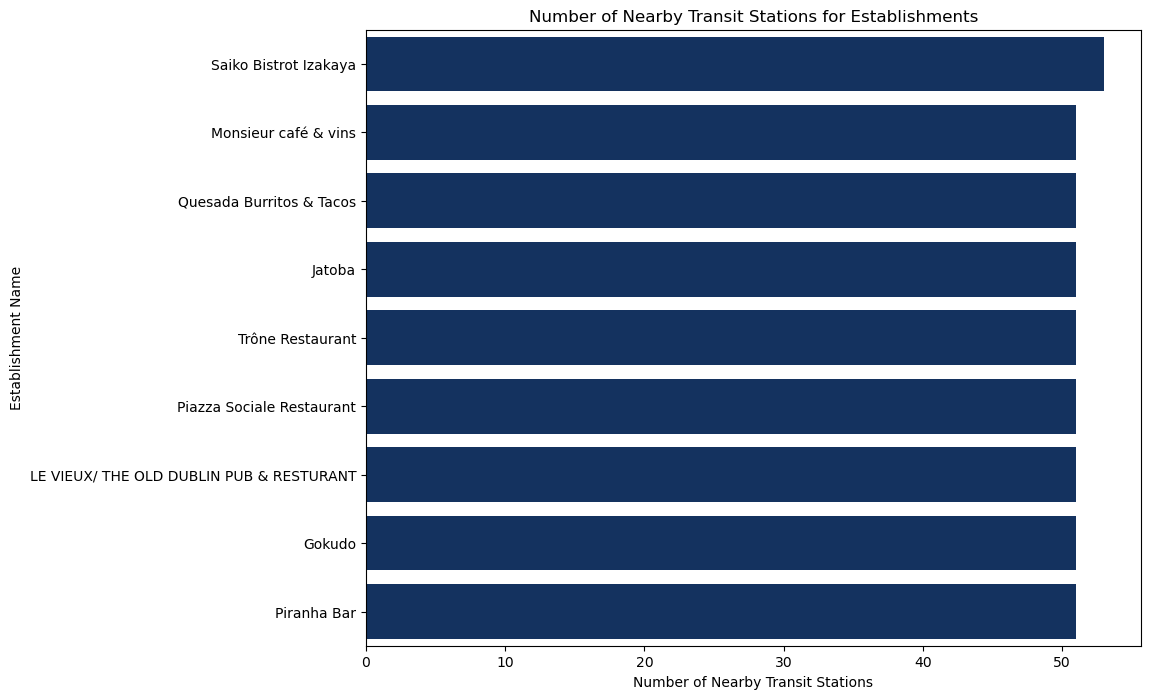

In [249]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Nearby_Stations', y='Name', data=bars_and_restaurants_nearby_stations_sorted_all_stations.head(10), color='#08306B')
plt.title('Number of Nearby Transit Stations for Establishments')
plt.xlabel('Number of Nearby Transit Stations')
plt.ylabel('Establishment Name')

plt.xticks(rotation=0)

plt.savefig('Number of Nearby Transit Stations for Establishments.png', bbox_inches='tight')
plt.savefig('Number of Nearby Transit Stations for Establishments.jpg', bbox_inches='tight')

plt.show()

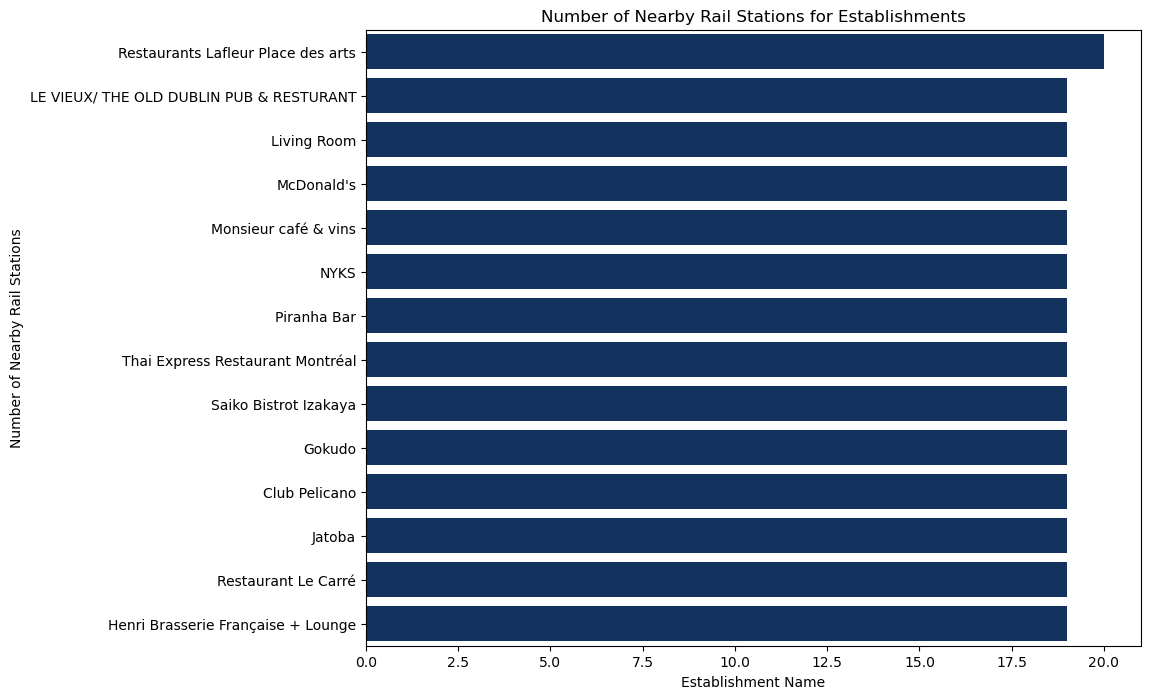

In [251]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Nearby_Rail_Stations', y='Name', data=bars_and_restaurants_nearby_stations_sorted_rail_stations.head(15), color='#08306B')
plt.xticks(rotation=0)
plt.title('Number of Nearby Rail Stations for Establishments')
plt.xlabel('Establishment Name')
plt.ylabel('Number of Nearby Rail Stations')

plt.savefig('Number of Nearby Rail Stations for Establishments.png', bbox_inches='tight')
plt.savefig('Number of Nearby Rail Stations for Establishments.jpg', bbox_inches='tight')

plt.show()

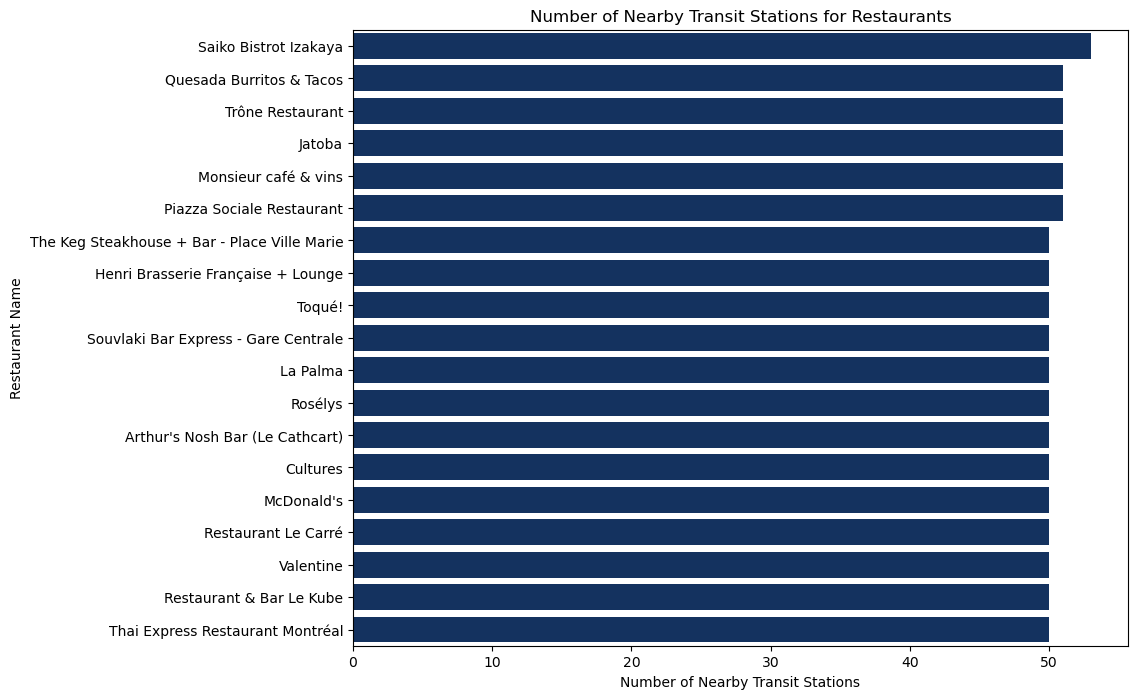

In [272]:
plt.figure(figsize=(10, 8))
sns.barplot(y='Name', x='Nearby_Stations', data=restaurants_in_montreal_sorted.head(19), color='#08306B')
plt.xticks(rotation=0)
plt.title('Number of Nearby Transit Stations for Restaurants')
plt.ylabel('Restaurant Name')
plt.xlabel('Number of Nearby Transit Stations')

plt.savefig('Number of Nearby Transit Stations for Restaurants.png', bbox_inches='tight')
plt.savefig('Number of Nearby Transit Stations for Restaurants.jpg', bbox_inches='tight')

plt.show()

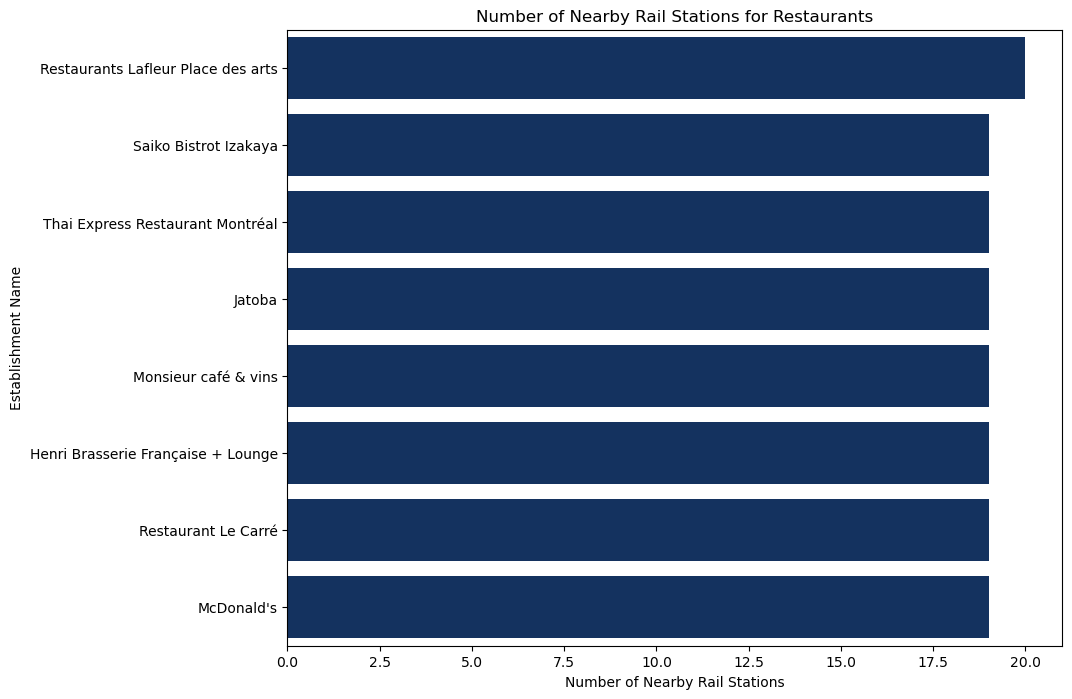

In [279]:
plt.figure(figsize=(10, 8))
sns.barplot(y='Name', x='Nearby_Rail_Stations', data=restaurants_in_montreal_sorted.head(8), color='#08306B')
plt.xticks(rotation=0)
plt.title('Number of Nearby Rail Stations for Restaurants')
plt.ylabel('Establishment Name')
plt.xlabel('Number of Nearby Rail Stations')

plt.savefig('Number of Nearby Rail Stations for Restaurants.png', bbox_inches='tight')
plt.savefig('Number of Nearby Rail Stations for Restaurants.jpg', bbox_inches='tight')

plt.show()

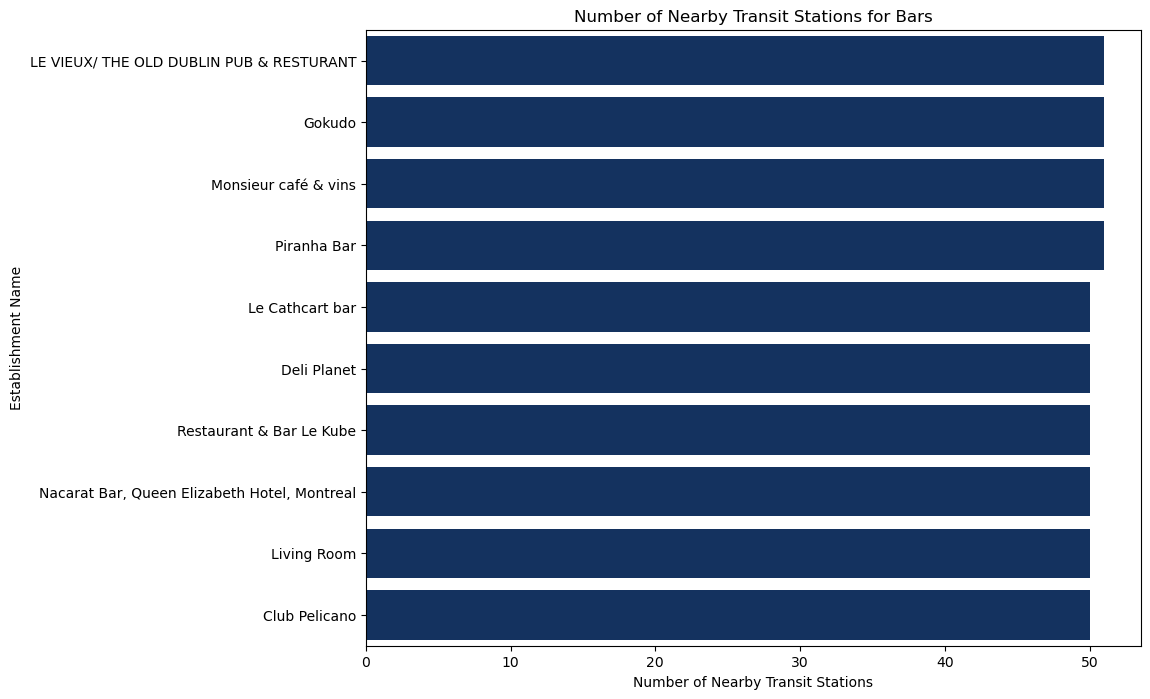

In [288]:
plt.figure(figsize=(10, 8))
sns.barplot(y='Name', x='Nearby_Stations', data=bars_in_montreal_sorted.head(10), color='#08306B')
plt.xticks(rotation=0)
plt.title('Number of Nearby Transit Stations for Bars')
plt.ylabel('Establishment Name')
plt.xlabel('Number of Nearby Transit Stations')

plt.savefig('Number of Nearby Transit Stations for Bars.png', bbox_inches='tight')
plt.savefig('Number of Nearby Transit Stations for Bars.jpg', bbox_inches='tight')

plt.show()

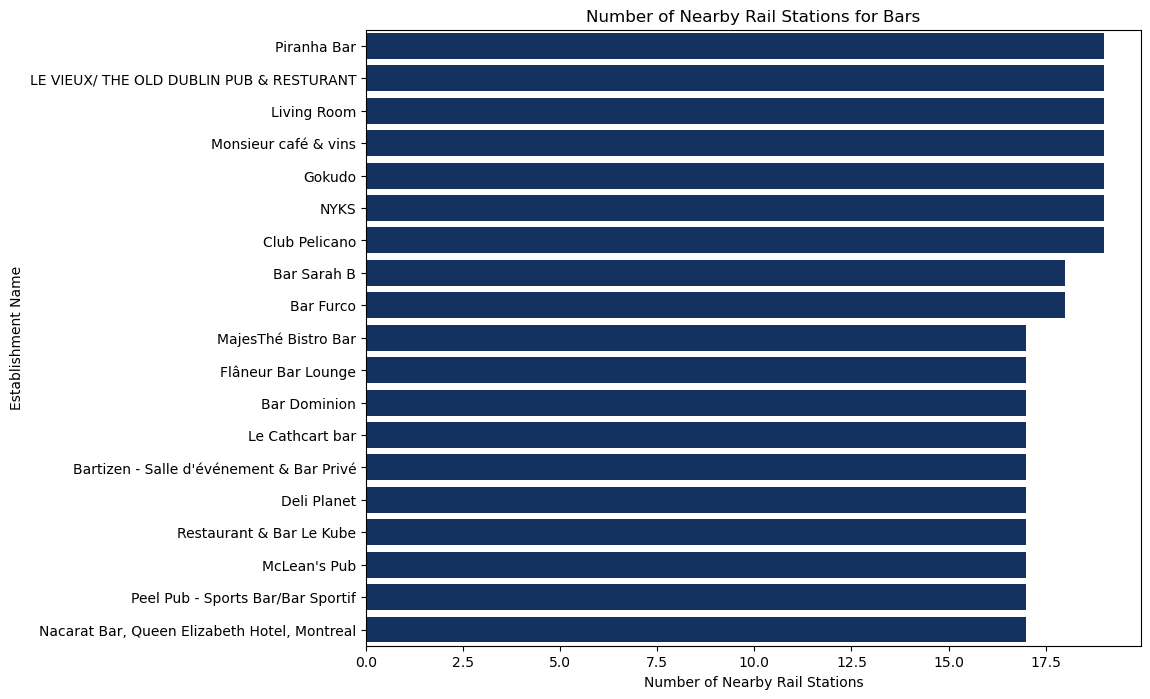

In [296]:
plt.figure(figsize=(10, 8))
sns.barplot(y='Name', x='Nearby_Rail_Stations', data=bars_in_montreal_sorted.head(19), color='#08306B')
plt.xticks(rotation=00)
plt.title('Number of Nearby Rail Stations for Bars')
plt.ylabel('Establishment Name')
plt.xlabel('Number of Nearby Rail Stations')

plt.savefig('Number of Nearby Rail Stations for Bars.png', bbox_inches='tight')
plt.savefig('Number of Nearby Rail Stations for Bars.jpg', bbox_inches='tight')

plt.show()

## Making Histograms Showing The Frequency Of The Number Of Nearby Stations Per Establishment

c:\Users\Laven\anaconda3\envs\lh_labs\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


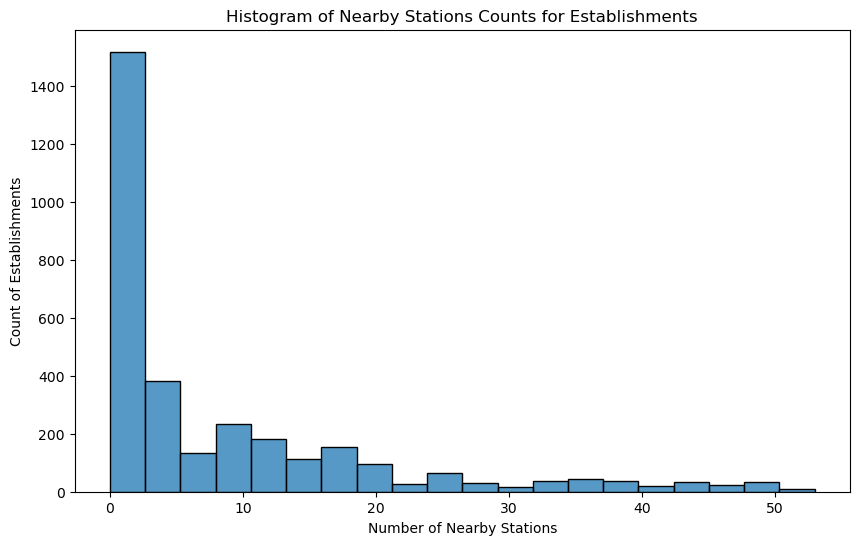

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(bars_and_restaurants_nearby_stations_sorted_all_stations['Nearby_Stations'], bins=20, kde=False)
plt.title('Histogram of Nearby Stations Counts for Establishments')
plt.xlabel('Number of Nearby Stations')
plt.ylabel('Count of Establishments')

plt.savefig('Histogram of Nearby Stations Counts for Establishments.png', bbox_inches='tight')
plt.savefig('Histogram of Nearby Stations Counts for Establishments.jpg', bbox_inches='tight')

plt.show()

c:\Users\Laven\anaconda3\envs\lh_labs\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


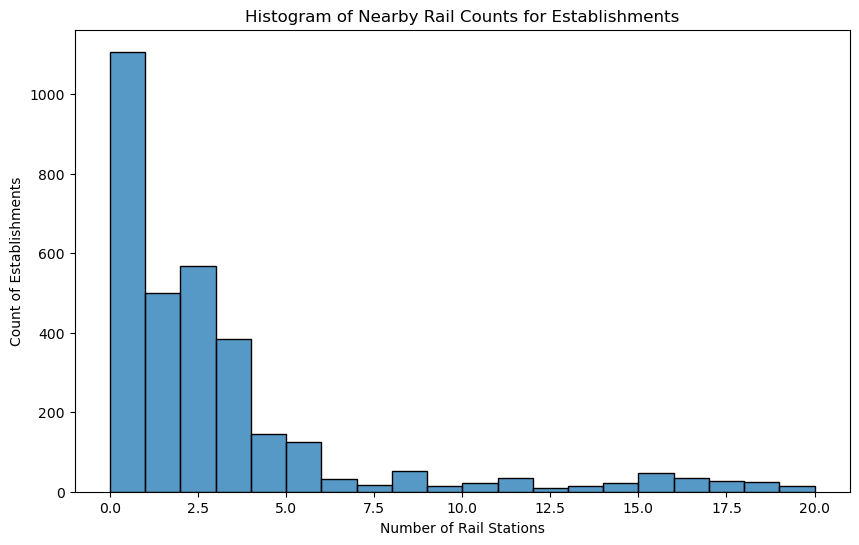

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(bars_and_restaurants_nearby_stations_sorted_all_stations['Nearby_Rail_Stations'], bins=20, kde=False)
plt.title('Histogram of Nearby Rail Counts for Establishments')
plt.xlabel('Number of Rail Stations')
plt.ylabel('Count of Establishments')

plt.savefig('Histogram of Nearby Rail Counts for Establishments.png', bbox_inches='tight')
plt.savefig('Histogram of Nearby Rail Counts for Establishments.jpg', bbox_inches='tight')

plt.show()

c:\Users\Laven\anaconda3\envs\lh_labs\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


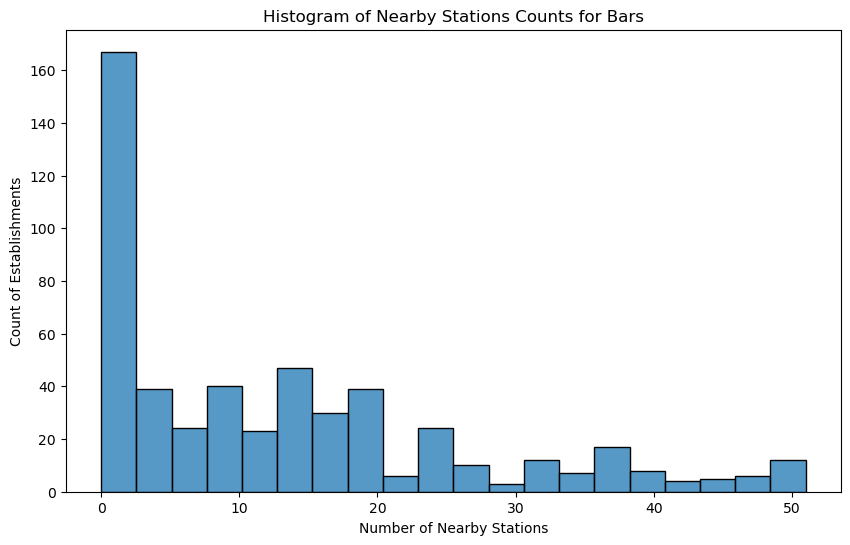

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(bars_in_montreal_sorted['Nearby_Stations'], bins=20, kde=False)
plt.title('Histogram of Nearby Stations Counts for Bars')
plt.xlabel('Number of Nearby Stations')
plt.ylabel('Count of Establishments')

plt.savefig('Histogram of Nearby Station Counts for Bars.png', bbox_inches='tight')
plt.savefig('Histogram of Nearby Station Counts for Bars.jpg', bbox_inches='tight')


plt.show()

c:\Users\Laven\anaconda3\envs\lh_labs\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


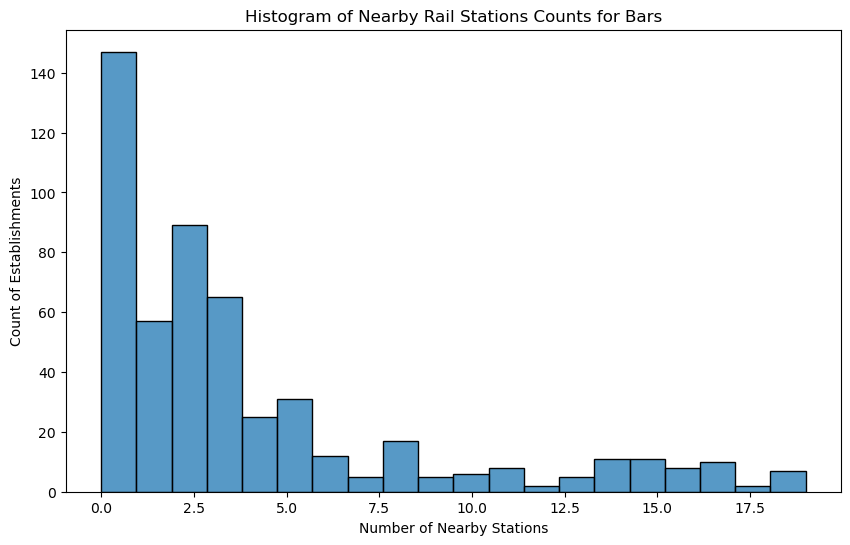

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(bars_in_montreal_sorted['Nearby_Rail_Stations'], bins=20, kde=False)
plt.title('Histogram of Nearby Rail Stations Counts for Bars')
plt.xlabel('Number of Nearby Stations')
plt.ylabel('Count of Establishments')

plt.savefig('Histogram of Nearby Rail Counts for Bars.png', bbox_inches='tight')
plt.savefig('Histogram of Nearby Rail Counts for Bars.jpg', bbox_inches='tight')

plt.show()

c:\Users\Laven\anaconda3\envs\lh_labs\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


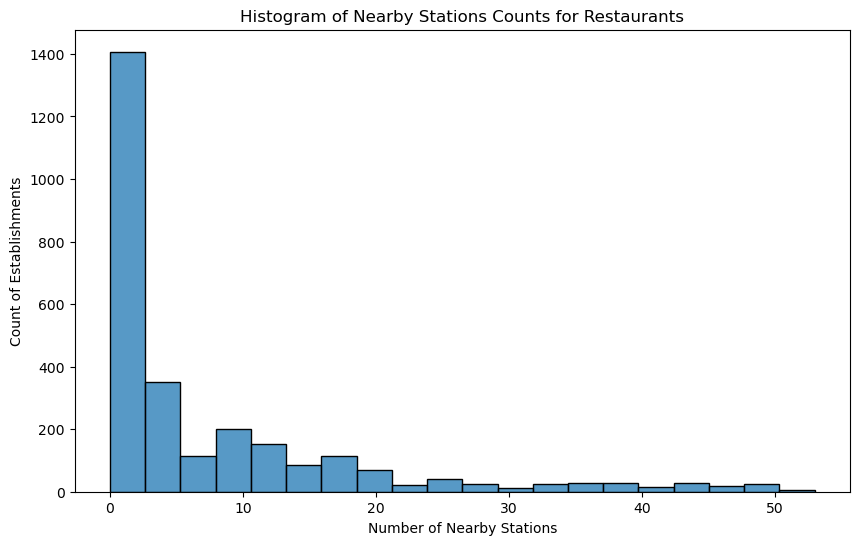

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(restaurants_in_montreal_sorted['Nearby_Stations'], bins=20, kde=False)
plt.title('Histogram of Nearby Stations Counts for Restaurants')
plt.xlabel('Number of Nearby Stations')
plt.ylabel('Count of Establishments')

plt.savefig('Histogram of Nearby Station Counts for Restaurants.png', bbox_inches='tight')
plt.savefig('Histogram of Nearby Station Counts for Restaurants.jpg', bbox_inches='tight')

plt.show()

## I will now make box plots to see how rating is associated with number of nearby stations

In [56]:
bars_and_restaurants_df_no_duplicates_utf8['Rating']

0       3.9
1       4.1
2       4.2
3       3.8
4       4.0
       ... 
3186    3.9
3187    4.5
3188    4.5
3189    4.4
3190    4.4
Name: Rating, Length: 3191, dtype: float64

In [57]:
# Define the bins for the rating categories
bins = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]

# Define the labels for the rating categories
labels = ['0.0-1.0', '1.1-2.0', '2.1-3.0', '3.1-4.0', '4.1-5.0']

# Create the new 'Rating Categories' column using pd.cut()
bars_and_restaurants_df_no_duplicates_utf8['Rating Categories'] = pd.cut(
    bars_and_restaurants_df_no_duplicates_utf8['Rating'], bins=bins, labels=labels, include_lowest=True)

In [58]:
bars_and_restaurants_df_no_duplicates_utf8.value_counts('Price Level')

Price Level
2.0    961
1.0    842
3.0     89
4.0     19
Name: count, dtype: int64

In [59]:
bars_and_restaurants_df_no_duplicates_utf8

,Name,Address,Latitude,Longitude,Rating,Price Level,Geohash,Type,Nearby_Stations,Nearby_Rail_Stations,Rating Categories
0,Pub St-Paul,"124 Rue Saint-Paul E, Montréal, QC H2Y 1G6",45.506944,-73.552500,3.9,2.0,f25dy,Bar,18,3,3.1-4.0
1,Piranha Bar,"680 Saint-Catherine St W, Montreal, Quebec H3B...",45.502852,-73.569942,4.1,1.0,f25dv,Bar,51,19,4.1-5.0
2,Patrick's Pub,"1707 Saint Denis St, Montreal, Quebec H2X 3K4",45.515570,-73.564079,4.2,2.0,f25dy,Bar,25,8,4.1-5.0
3,MVP Resto-Bar Sportif,"200 St Catherine St E, Montreal, Quebec H2X 1L1",45.511730,-73.561981,3.8,2.0,f25dy,Bar,35,9,3.1-4.0
4,Pub John Michaels,"458 Pl. Jacques-Cartier, Montréal, QC H2Y 3Z2",45.508011,-73.553953,4.0,2.0,f25dy,Bar,24,6,3.1-4.0
...,...,...,...,...,...,...,...,...,...,...,...
3186,Les Enfants Terribles — Outremont,"1257 Bernard Ave, Outremont, Quebec H2V 1V8",45.519924,-73.609135,3.9,3.0,f25du,Restaurant,3,1,3.1-4.0
3187,Pho Bep Cuisine Vietnamienne,"102 Rue Saint-Viateur O, Montréal, QC H2T 2L1",45.524414,-73.600046,4.5,NaN,f25dv,Restaurant,12,1,4.1-5.0
3188,Yuukai sushi,"5407 Park Ave, Montreal, Quebec H2V 4G9",45.522069,-73.601220,4.5,2.0,f25dv,Restaurant,8,0,4.1-5.0
3189,Pizzeria Magpie Mile End,"16 Maguire St, Montreal, Quebec H2T 1B8",45.524703,-73.595522,4.4,2.0,f25dv,Restaurant,16,2,4.1-5.0


In [162]:
# Define a mapping from numerical values to categorical labels
price_mapping = {
    1.0: 'Low',
    2.0: 'Medium',
    3.0: 'Expensive',
    4.0: 'Very Expensive'
}

In [61]:
bars_and_restaurants_df_pricecat = bars_and_restaurants_df_no_duplicates_utf8.copy()


In [62]:
bars_and_restaurants_df_pricecat = bars_and_restaurants_df_pricecat.dropna(subset=['Price Level'])

In [63]:
bars_and_restaurants_df_pricecat['Price Level Category'] = bars_and_restaurants_df_pricecat['Price Level'].map(price_mapping)


In [131]:
bars_and_restaurants_df_pricecat['Price Level Category'] = pd.Categorical(
    bars_and_restaurants_df_pricecat['Price Level Category'],
    categories=['Low', 'Medium', 'Expensive', 'Very Expensive'],
    ordered=True
)

In [65]:
bars_and_restaurants_df_pricecat['Price Level Category'] = bars_and_restaurants_df_pricecat['Price Level'].map(price_mapping)



c:\Users\Laven\anaconda3\envs\lh_labs\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Laven\AppData\Local\Temp\ipykernel_30020\1390592967.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = bars_and_restaurants_df_no_duplicates_utf8.groupby('Rating Categories')['Nearby_Stations'].apply(list)


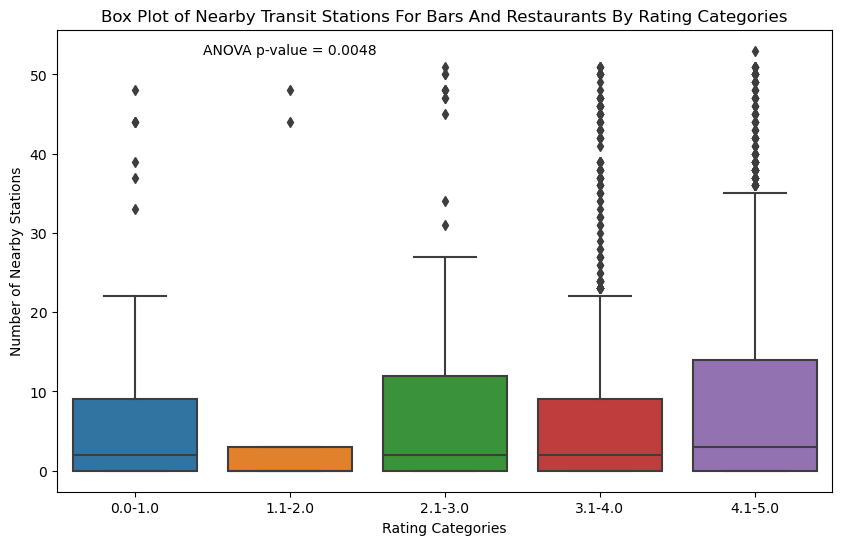

In [138]:
# Assuming your DataFrame is called bars_and_restaurants_df_no_duplicates_utf8
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Rating Categories', y='Nearby_Stations', data=bars_and_restaurants_df_no_duplicates_utf8)
plt.title('Box Plot of Nearby Transit Stations For Bars And Restaurants By Rating Categories')
plt.xlabel('Rating Categories')
plt.ylabel('Number of Nearby Stations')

# First, group the data by 'Rating Categories' and create a list of 'Nearby_Stations' for each category
groups = bars_and_restaurants_df_no_duplicates_utf8.groupby('Rating Categories')['Nearby_Stations'].apply(list)

# Perform ANOVA using the f_oneway function
f_statistic, p_value = f_oneway(*groups)

# Define x and y coordinates for the text position
x_position = max(ax.get_xlim()) / 4.5
y_position = max(ax.get_ylim()) * 0.97


plt.text(x_position, y_position, f'ANOVA p-value = {p_value:.2g}', ha='center', va='top')

plt.savefig('Box Plots of Nearby Station Counts for Bars And Restaurant By Rating Categories.png', bbox_inches='tight')
plt.savefig('Box Plots of Nearby Station Counts for Bars And Restaurants By Rating Categories.jpg', bbox_inches='tight')

plt.show()

c:\Users\Laven\anaconda3\envs\lh_labs\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Laven\AppData\Local\Temp\ipykernel_30020\1392346176.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = bars_and_restaurants_df_no_duplicates_utf8.groupby('Rating Categories')['Nearby_Rail_Stations'].apply(list)


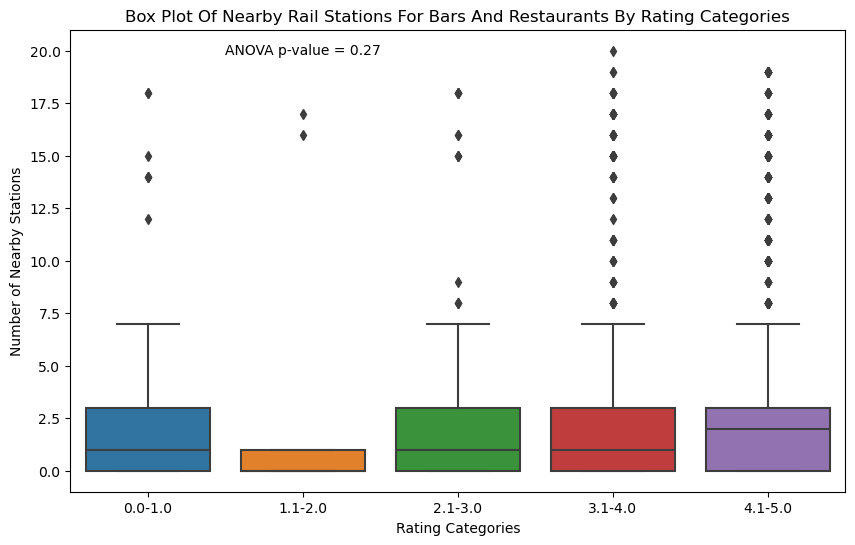

In [142]:
# Assuming your DataFrame is called bars_and_restaurants_df_no_duplicates_utf8
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Rating Categories', y='Nearby_Rail_Stations', data=bars_and_restaurants_df_no_duplicates_utf8)
plt.title('Box Plot Of Nearby Rail Stations For Bars And Restaurants By Rating Categories')
plt.xlabel('Rating Categories')
plt.ylabel('Number of Nearby Stations')

# First, group the data by 'Rating Categories' and create a list of 'Nearby_Stations' for each category
groups = bars_and_restaurants_df_no_duplicates_utf8.groupby('Rating Categories')['Nearby_Rail_Stations'].apply(list)

# Perform ANOVA using the f_oneway function
f_statistic, p_value = f_oneway(*groups)

# Define x and y coordinates for the text position
x_position = max(ax.get_xlim()) / 4.5
y_position = max(ax.get_ylim()) * 0.97


plt.text(x_position, y_position, f'ANOVA p-value = {p_value:.2g}', ha='center', va='top')

plt.savefig('Box Plots Of Nearby Rail Counts For Bars And Restaurants By Rating Categories.png', bbox_inches='tight')
plt.savefig('Box Plots Of Nearby Rail Counts For Bars And Restaurants By Rating Categories.jpg', bbox_inches='tight')

plt.show()

c:\Users\Laven\anaconda3\envs\lh_labs\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Laven\AppData\Local\Temp\ipykernel_30020\3225705351.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = bars_and_restaurants_df_pricecat.groupby('Price Level Category')['Nearby_Stations'].apply(list)


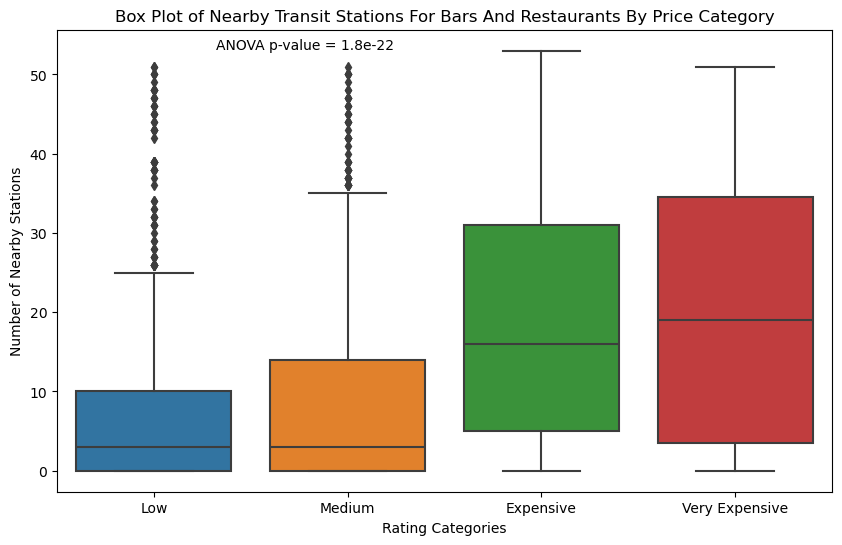

In [140]:
# Assuming your DataFrame is called bars_and_restaurants_df_no_duplicates_utf8
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Price Level Category', y='Nearby_Stations', data=bars_and_restaurants_df_pricecat)
plt.title('Box Plot of Nearby Transit Stations For Bars And Restaurants By Price Category')
plt.xlabel('Rating Categories')
plt.ylabel('Number of Nearby Stations')

# First, group the data by 'Rating Categories' and create a list of 'Nearby_Stations' for each category
groups = bars_and_restaurants_df_pricecat.groupby('Price Level Category')['Nearby_Stations'].apply(list)

# Perform ANOVA using the f_oneway function
f_statistic, p_value = f_oneway(*groups)

# Define x and y coordinates for the text position
x_position = max(ax.get_xlim()) / 4.5
y_position = max(ax.get_ylim()) * 0.98


plt.text(x_position, y_position, f'ANOVA p-value = {p_value:.2g}', ha='center', va='top')

plt.savefig('Box Plots Of Nearby Station Counts For Bars And Restaurants By Price Category.png', bbox_inches='tight')
plt.savefig('Box Plots Of Nearby Station Counts For Bars And Restaurants By Price Category.jpg', bbox_inches='tight')

plt.show()

c:\Users\Laven\anaconda3\envs\lh_labs\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Laven\AppData\Local\Temp\ipykernel_30020\1065672006.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = bars_and_restaurants_df_pricecat.groupby('Price Level Category')['Nearby_Stations'].apply(list)


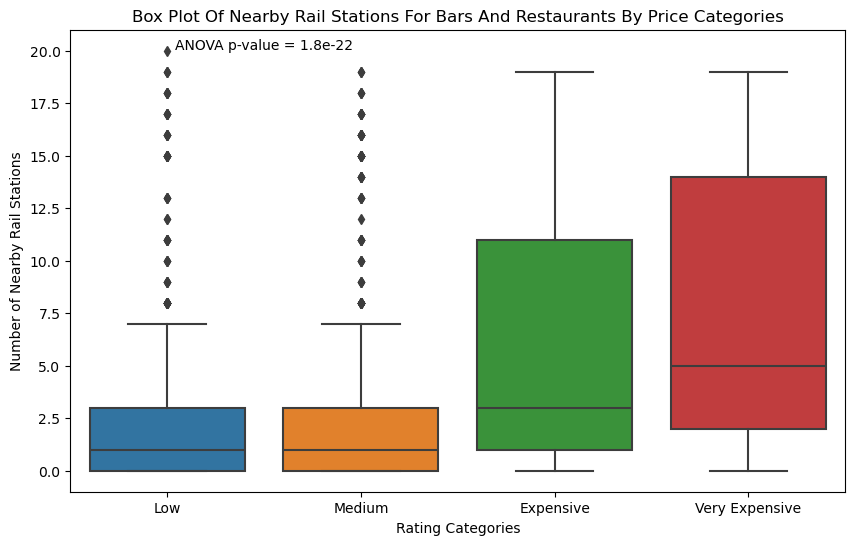

In [141]:
# Assuming your DataFrame is called bars_and_restaurants_df_no_duplicates_utf8
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Price Level Category', y='Nearby_Rail_Stations', data=bars_and_restaurants_df_pricecat)
plt.title('Box Plot Of Nearby Rail Stations For Bars And Restaurants By Price Categories')
plt.xlabel('Rating Categories')
plt.ylabel('Number of Nearby Rail Stations')

# First, group the data by 'Rating Categories' and create a list of 'Nearby_Stations' for each category
groups = bars_and_restaurants_df_pricecat.groupby('Price Level Category')['Nearby_Stations'].apply(list)

# Perform ANOVA using the f_oneway function
f_statistic, p_value = f_oneway(*groups)

# Define x and y coordinates for the text position
x_position = max(ax.get_xlim()) / 7
y_position = max(ax.get_ylim()) * 0.98


plt.text(x_position, y_position, f'ANOVA p-value = {p_value:.2g}', ha='center', va='top')

plt.savefig('Box Plots Of Nearby Rail Counts For Bars And Restaurants By Price Categories.png', bbox_inches='tight')
plt.savefig('Box Plots Of Nearby Rail Counts For Bars And Restaurants By Price Categories.jpg', bbox_inches='tight')

plt.show()

In [83]:
bars_in_montreal_collected_unique_utf8

,Name,Address,Latitude,Longitude,Rating,Price Level,Geohash,Nearby_Stations,Nearby_Rail_Stations
0,Pub St-Paul,"124 Rue Saint-Paul E, Montréal, QC H2Y 1G6",45.506944,-73.552500,3.9,2.0,f25dy,18,3
1,Piranha Bar,"680 Saint-Catherine St W, Montreal, Quebec H3B...",45.502852,-73.569942,4.1,1.0,f25dv,51,19
2,Patrick's Pub,"1707 Saint Denis St, Montreal, Quebec H2X 3K4",45.515570,-73.564079,4.2,2.0,f25dy,25,8
3,MVP Resto-Bar Sportif,"200 St Catherine St E, Montreal, Quebec H2X 1L1",45.511730,-73.561981,3.8,2.0,f25dy,35,9
4,Pub John Michaels,"458 Pl. Jacques-Cartier, Montréal, QC H2Y 3Z2",45.508011,-73.553953,4.0,2.0,f25dy,24,6
...,...,...,...,...,...,...,...,...,...
518,M Resto-Bar,"3625 Rue Talon, Sainte-Catherine, QC J5C 1T7",45.387405,-73.553055,4.4,2.0,f25dn,0,0
519,BLVD Bar & Gril,"100 Rue Kepler, Châteauguay, QC J6K 2X9",45.360540,-73.712815,4.5,2.0,f25d4,0,0
520,Barbossa,"3956 A St Laurent Blvd, Montreal, Quebec H2W 1Y3",45.516651,-73.578985,4.1,2.0,f25dv,12,2
521,KARAOKE BAR 3 MINOTS,"3812 St Laurent Blvd, Montreal, Quebec H2W 1X6",45.515533,-73.576472,3.4,1.0,f25dv,14,1


In [84]:
# Create the new 'Rating Categories' column using pd.cut()
bars_in_montreal_collected_unique_utf8['Rating Categories'] = pd.cut(
    bars_in_montreal_collected_unique_utf8['Rating'], bins=bins, labels=labels, include_lowest=True)

In [85]:
bars_in_montreal_collected_unique_utf8

,Name,Address,Latitude,Longitude,Rating,Price Level,Geohash,Nearby_Stations,Nearby_Rail_Stations,Rating Categories
0,Pub St-Paul,"124 Rue Saint-Paul E, Montréal, QC H2Y 1G6",45.506944,-73.552500,3.9,2.0,f25dy,18,3,3.1-4.0
1,Piranha Bar,"680 Saint-Catherine St W, Montreal, Quebec H3B...",45.502852,-73.569942,4.1,1.0,f25dv,51,19,4.1-5.0
2,Patrick's Pub,"1707 Saint Denis St, Montreal, Quebec H2X 3K4",45.515570,-73.564079,4.2,2.0,f25dy,25,8,4.1-5.0
3,MVP Resto-Bar Sportif,"200 St Catherine St E, Montreal, Quebec H2X 1L1",45.511730,-73.561981,3.8,2.0,f25dy,35,9,3.1-4.0
4,Pub John Michaels,"458 Pl. Jacques-Cartier, Montréal, QC H2Y 3Z2",45.508011,-73.553953,4.0,2.0,f25dy,24,6,3.1-4.0
...,...,...,...,...,...,...,...,...,...,...
518,M Resto-Bar,"3625 Rue Talon, Sainte-Catherine, QC J5C 1T7",45.387405,-73.553055,4.4,2.0,f25dn,0,0,4.1-5.0
519,BLVD Bar & Gril,"100 Rue Kepler, Châteauguay, QC J6K 2X9",45.360540,-73.712815,4.5,2.0,f25d4,0,0,4.1-5.0
520,Barbossa,"3956 A St Laurent Blvd, Montreal, Quebec H2W 1Y3",45.516651,-73.578985,4.1,2.0,f25dv,12,2,4.1-5.0
521,KARAOKE BAR 3 MINOTS,"3812 St Laurent Blvd, Montreal, Quebec H2W 1X6",45.515533,-73.576472,3.4,1.0,f25dv,14,1,3.1-4.0


c:\Users\Laven\anaconda3\envs\lh_labs\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Laven\AppData\Local\Temp\ipykernel_30020\633875328.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = bars_in_montreal_collected_unique_utf8.groupby('Rating Categories')['Nearby_Stations'].apply(list)
c:\Users\Laven\anaconda3\envs\lh_labs\lib\site-packages\scipy\stats\_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


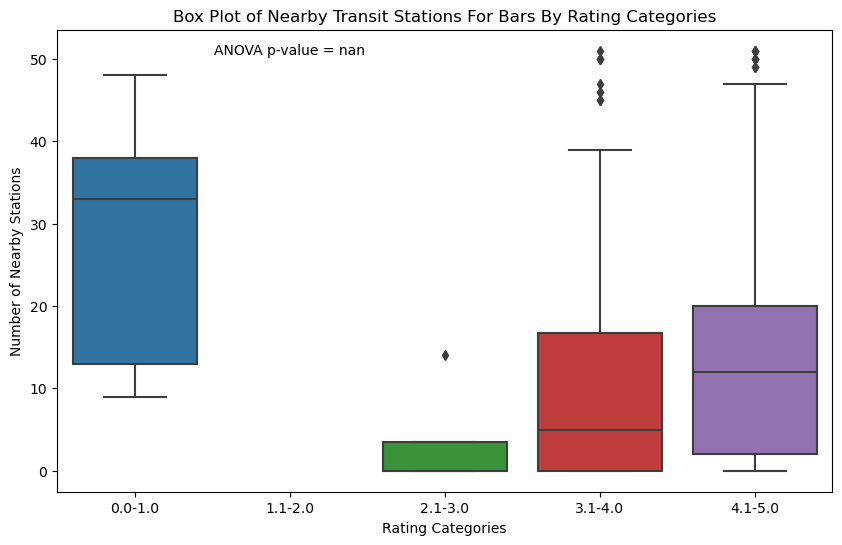

In [100]:
# Assuming your DataFrame is called bars_and_restaurants_df_no_duplicates_utf8
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Rating Categories', y='Nearby_Stations', data=bars_in_montreal_collected_unique_utf8)
plt.title('Box Plot of Nearby Transit Stations For Bars By Rating Categories')
plt.xlabel('Rating Categories')
plt.ylabel('Number of Nearby Stations')

# First, group the data by 'Rating Categories' and create a list of 'Nearby_Stations' for each category
groups = bars_in_montreal_collected_unique_utf8.groupby('Rating Categories')['Nearby_Stations'].apply(list)

# Perform ANOVA using the f_oneway function
f_statistic, p_value = f_oneway(*groups)

# Define x and y coordinates for the text position
x_position = max(ax.get_xlim()) / 4.5
y_position = max(ax.get_ylim()) * 0.97


plt.text(x_position, y_position, f'ANOVA p-value = {p_value:.2g}', ha='center', va='top')

plt.savefig('Box Plots of Nearby Station Counts for Bars By Rating Categories.png', bbox_inches='tight')
plt.savefig('Box Plots of Nearby Station Counts for Bars By Rating Categories.jpg', bbox_inches='tight')

plt.show()

c:\Users\Laven\anaconda3\envs\lh_labs\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Laven\AppData\Local\Temp\ipykernel_30020\3675919270.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = bars_in_montreal_collected_unique_utf8.groupby('Rating Categories')['Nearby_Rail_Stations'].apply(list)
c:\Users\Laven\anaconda3\envs\lh_labs\lib\site-packages\scipy\stats\_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


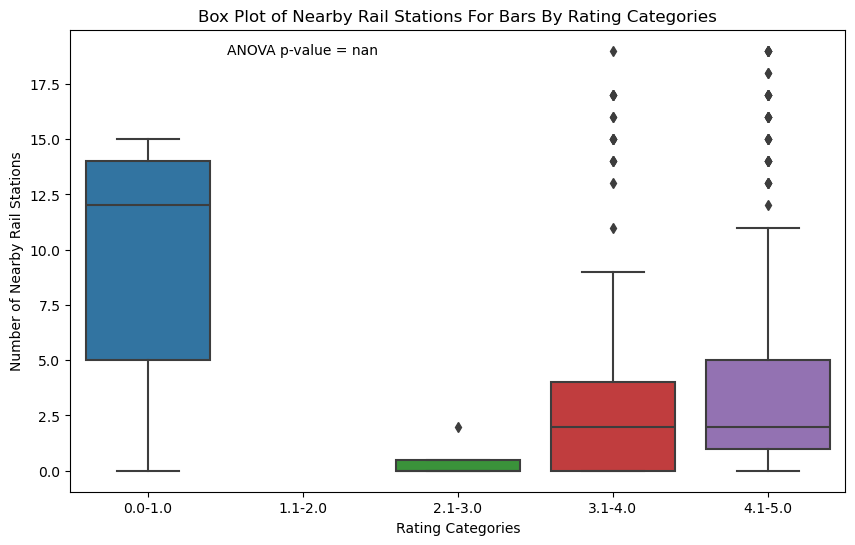

In [101]:
# Assuming your DataFrame is called bars_and_restaurants_df_no_duplicates_utf8
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Rating Categories', y='Nearby_Rail_Stations', data=bars_in_montreal_collected_unique_utf8)
plt.title('Box Plot of Nearby Rail Stations For Bars By Rating Categories')
plt.xlabel('Rating Categories')
plt.ylabel('Number of Nearby Rail Stations')

# First, group the data by 'Rating Categories' and create a list of 'Nearby_Stations' for each category
groups = bars_in_montreal_collected_unique_utf8.groupby('Rating Categories')['Nearby_Rail_Stations'].apply(list)

# Perform ANOVA using the f_oneway function
f_statistic, p_value = f_oneway(*groups)

# Define x and y coordinates for the text position
x_position = max(ax.get_xlim()) / 4.5
y_position = max(ax.get_ylim()) * 0.97


plt.text(x_position, y_position, f'ANOVA p-value = {p_value:.2g}', ha='center', va='top')

plt.savefig('Box Plots Of Nearby Rail Counts For Bars By Rating Categories.png', bbox_inches='tight')
plt.savefig('Box Plots Of Nearby Rail Counts For Bars By Rating Categoreis.jpg', bbox_inches='tight')

plt.show()

In [102]:
bars_in_montreal_collected_unique_utf8

bars_in_montreal_pricecat = bars_in_montreal_collected_unique_utf8.copy()


In [103]:
bars_in_montreal_pricecat = bars_in_montreal_pricecat.dropna(subset=['Price Level'])

In [104]:
bars_in_montreal_pricecat['Price Level Category'] = bars_in_montreal_pricecat['Price Level'].map(price_mapping)


In [127]:
bars_in_montreal_pricecat['Price Level Category'] = pd.Categorical(
    bars_in_montreal_pricecat['Price Level Category'],
    categories=['Low', 'Medium', 'Expensive'],
    ordered=True
)

In [123]:
bars_in_montreal_pricecat['Price Level Category'] = bars_in_montreal_pricecat['Price Level'].map(price_mapping)


In [124]:
bars_in_montreal_pricecat['Price Level Category'].value_counts()

Price Level Category
Medium       225
Low          121
Expensive     18
Name: count, dtype: int64

c:\Users\Laven\anaconda3\envs\lh_labs\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Laven\AppData\Local\Temp\ipykernel_30020\2129142559.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = bars_in_montreal_pricecat.groupby('Price Level Category')['Nearby_Stations'].apply(list)


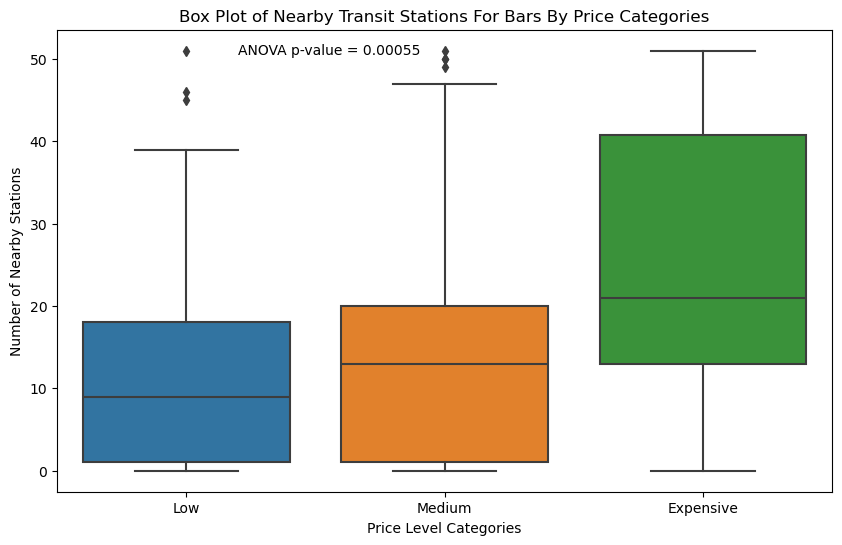

In [128]:
# Assuming your DataFrame is called bars_and_restaurants_df_no_duplicates_utf8
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Price Level Category', y='Nearby_Stations', data=bars_in_montreal_pricecat)
plt.title('Box Plot of Nearby Transit Stations For Bars By Price Categories')
plt.xlabel('Price Level Categories')
plt.ylabel('Number of Nearby Stations')

# First, group the data by 'Rating Categories' and create a list of 'Nearby_Stations' for each category
groups = bars_in_montreal_pricecat.groupby('Price Level Category')['Nearby_Stations'].apply(list)

# Perform ANOVA using the f_oneway function
f_statistic, p_value = f_oneway(*groups)

# Define x and y coordinates for the text position
x_position = max(ax.get_xlim()) / 4.5
y_position = max(ax.get_ylim()) * 0.97


plt.text(x_position, y_position, f'ANOVA p-value = {p_value:.2g}', ha='center', va='top')

plt.savefig('Box Plots of Nearby Station Counts for Bars By Price Category.png', bbox_inches='tight')
plt.savefig('Box Plots of Nearby Station Counts for Bars By Price Category.jpg', bbox_inches='tight')

plt.show()

c:\Users\Laven\anaconda3\envs\lh_labs\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Laven\AppData\Local\Temp\ipykernel_30020\2183829013.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = bars_in_montreal_pricecat.groupby('Price Level Category')['Nearby_Stations'].apply(list)


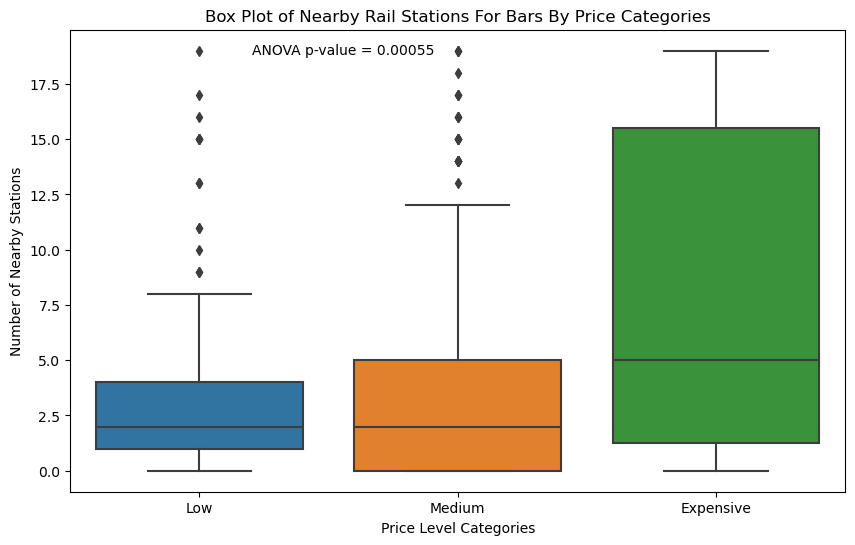

In [129]:
# Assuming your DataFrame is called bars_and_restaurants_df_no_duplicates_utf8
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Price Level Category', y='Nearby_Rail_Stations', data=bars_in_montreal_pricecat)
plt.title('Box Plot of Nearby Rail Stations For Bars By Price Categories')
plt.xlabel('Price Level Categories')
plt.ylabel('Number of Nearby Stations')

# First, group the data by 'Rating Categories' and create a list of 'Nearby_Stations' for each category
groups = bars_in_montreal_pricecat.groupby('Price Level Category')['Nearby_Stations'].apply(list)

# Perform ANOVA using the f_oneway function
f_statistic, p_value = f_oneway(*groups)

# Define x and y coordinates for the text position
x_position = max(ax.get_xlim()) / 4.5
y_position = max(ax.get_ylim()) * 0.97


plt.text(x_position, y_position, f'ANOVA p-value = {p_value:.2g}', ha='center', va='top')

plt.savefig('Box Plots of Nearby Rail Counts for Bars By Price Category.png', bbox_inches='tight')
plt.savefig('Box Plots of Nearby Rail Counts for Bars By Price Category.jpg', bbox_inches='tight')

plt.show()



In [150]:
# Create the new 'Rating Categories' column using pd.cut()
restaurants_in_montreal_collected_unique_utf8['Rating Categories'] = pd.cut(
    restaurants_in_montreal_collected_unique_utf8['Rating'], bins=bins, labels=labels, include_lowest=True)

In [151]:
restaurants_in_montreal_collected_unique_utf8

,Name,Address,Latitude,Longitude,Rating,Price Level,Geohash,Nearby_Stations,Nearby_Rail_Stations,Rating Category,Rating Categories
0,Restaurant Branzino,"50 René-Lévesque Blvd W, Montreal, Quebec H2Z 1A2",45.508147,-73.561650,3.9,NaN,f25dy,44,14,NaN,3.1-4.0
1,Bar et Restaurant La Catrina - Vieux-Port,"119 De la Commune St W, Montreal, Quebec H2Y 2C7",45.503820,-73.553983,4.1,2.0,f25dy,23,4,NaN,4.1-5.0
2,COMMODORE restaurant Montréal,"355 Blvd. De Maisonneuve Ouest, Montreal, Queb...",45.507151,-73.569114,3.9,NaN,f25dv,42,16,NaN,3.1-4.0
3,Restaurant Keung Kee,"70 Rue De la Gauchetière O, Montréal, QC H2Z 1C1",45.507253,-73.560407,3.9,2.0,f25dy,45,15,NaN,3.1-4.0
4,Beijing Restaurant,"92 Rue De la Gauchetière O, Montréal, QC H2Z 1C1",45.506930,-73.560560,4.1,2.0,f25dy,44,16,NaN,4.1-5.0
...,...,...,...,...,...,...,...,...,...,...,...
2767,Les Enfants Terribles — Outremont,"1257 Bernard Ave, Outremont, Quebec H2V 1V8",45.519924,-73.609135,3.9,3.0,f25du,3,1,NaN,3.1-4.0
2768,Pho Bep Cuisine Vietnamienne,"102 Rue Saint-Viateur O, Montréal, QC H2T 2L1",45.524414,-73.600046,4.5,NaN,f25dv,12,1,NaN,4.1-5.0
2769,Yuukai sushi,"5407 Park Ave, Montreal, Quebec H2V 4G9",45.522069,-73.601220,4.5,2.0,f25dv,8,0,NaN,4.1-5.0
2770,Pizzeria Magpie Mile End,"16 Maguire St, Montreal, Quebec H2T 1B8",45.524703,-73.595522,4.4,2.0,f25dv,16,2,NaN,4.1-5.0


In [155]:
restaurants_in_montreal_collected_unique_utf8 = restaurants_in_montreal_collected_unique_utf8.drop('Rating Category', axis = 1)

In [156]:
restaurants_in_montreal_collected_unique_utf8



,Name,Address,Latitude,Longitude,Rating,Price Level,Geohash,Nearby_Stations,Nearby_Rail_Stations,Rating Categories
0,Restaurant Branzino,"50 René-Lévesque Blvd W, Montreal, Quebec H2Z 1A2",45.508147,-73.561650,3.9,NaN,f25dy,44,14,3.1-4.0
1,Bar et Restaurant La Catrina - Vieux-Port,"119 De la Commune St W, Montreal, Quebec H2Y 2C7",45.503820,-73.553983,4.1,2.0,f25dy,23,4,4.1-5.0
2,COMMODORE restaurant Montréal,"355 Blvd. De Maisonneuve Ouest, Montreal, Queb...",45.507151,-73.569114,3.9,NaN,f25dv,42,16,3.1-4.0
3,Restaurant Keung Kee,"70 Rue De la Gauchetière O, Montréal, QC H2Z 1C1",45.507253,-73.560407,3.9,2.0,f25dy,45,15,3.1-4.0
4,Beijing Restaurant,"92 Rue De la Gauchetière O, Montréal, QC H2Z 1C1",45.506930,-73.560560,4.1,2.0,f25dy,44,16,4.1-5.0
...,...,...,...,...,...,...,...,...,...,...
2767,Les Enfants Terribles — Outremont,"1257 Bernard Ave, Outremont, Quebec H2V 1V8",45.519924,-73.609135,3.9,3.0,f25du,3,1,3.1-4.0
2768,Pho Bep Cuisine Vietnamienne,"102 Rue Saint-Viateur O, Montréal, QC H2T 2L1",45.524414,-73.600046,4.5,NaN,f25dv,12,1,4.1-5.0
2769,Yuukai sushi,"5407 Park Ave, Montreal, Quebec H2V 4G9",45.522069,-73.601220,4.5,2.0,f25dv,8,0,4.1-5.0
2770,Pizzeria Magpie Mile End,"16 Maguire St, Montreal, Quebec H2T 1B8",45.524703,-73.595522,4.4,2.0,f25dv,16,2,4.1-5.0


In [160]:
restaurants_in_montreal_pricecat = restaurants_in_montreal_collected_unique_utf8.copy()

In [161]:
restaurants_in_montreal_pricecat = restaurants_in_montreal_pricecat.dropna(subset=['Price Level'])

In [163]:
restaurants_in_montreal_pricecat['Price Level Category'] = restaurants_in_montreal_pricecat['Price Level'].map(price_mapping)


In [165]:
# Then, define the category type with the order
from pandas.api.types import CategoricalDtype

price_level_order = CategoricalDtype(
    ['Low', 'Medium', 'Expensive', 'Very Expensive'], 
    ordered=True
)

In [170]:
restaurants_in_montreal_pricecat['Price Level Category'] = restaurants_in_montreal_pricecat['Price Level Category'].astype(price_level_order)

c:\Users\Laven\anaconda3\envs\lh_labs\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Laven\AppData\Local\Temp\ipykernel_30020\1689484128.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = restaurants_in_montreal_collected_unique_utf8.groupby('Rating Categories')['Nearby_Stations'].apply(list)


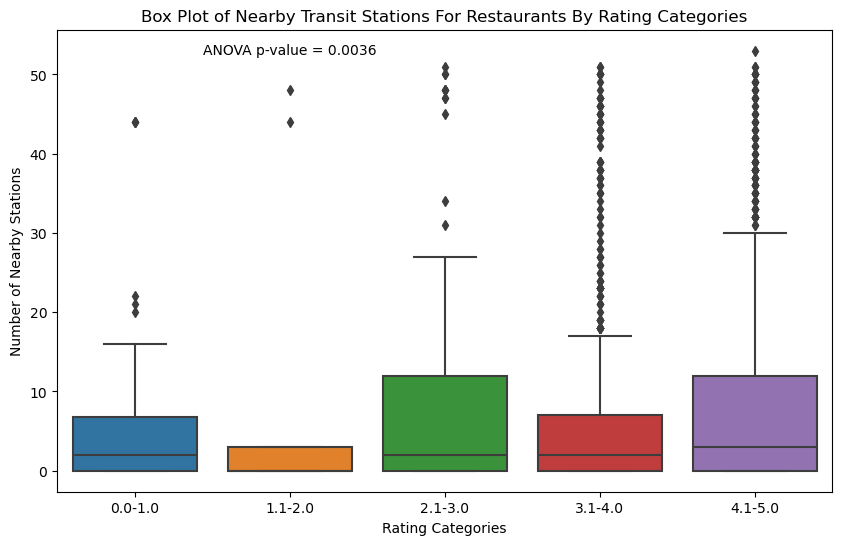

In [157]:
# Assuming your DataFrame is called bars_and_restaurants_df_no_duplicates_utf8
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Rating Categories', y='Nearby_Stations', data=restaurants_in_montreal_collected_unique_utf8)
plt.title('Box Plot of Nearby Transit Stations For Restaurants By Rating Categories')
plt.xlabel('Rating Categories')
plt.ylabel('Number of Nearby Stations')

# First, group the data by 'Rating Categories' and create a list of 'Nearby_Stations' for each category
groups = restaurants_in_montreal_collected_unique_utf8.groupby('Rating Categories')['Nearby_Stations'].apply(list)

# Perform ANOVA using the f_oneway function
f_statistic, p_value = f_oneway(*groups)

# Define x and y coordinates for the text position
x_position = max(ax.get_xlim()) / 4.5
y_position = max(ax.get_ylim()) * 0.97


plt.text(x_position, y_position, f'ANOVA p-value = {p_value:.2g}', ha='center', va='top')

plt.savefig('Box Plots Of Nearby Station Counts For Restaurants By Rating Categories.png', bbox_inches='tight')
plt.savefig('Box Plots Of Nearby Station Counts For Restaurants By Rating Categories.jpg', bbox_inches='tight')

plt.show()

c:\Users\Laven\anaconda3\envs\lh_labs\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Laven\AppData\Local\Temp\ipykernel_30020\1968691899.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = restaurants_in_montreal_collected_unique_utf8.groupby('Rating Categories')['Nearby_Rail_Stations'].apply(list)


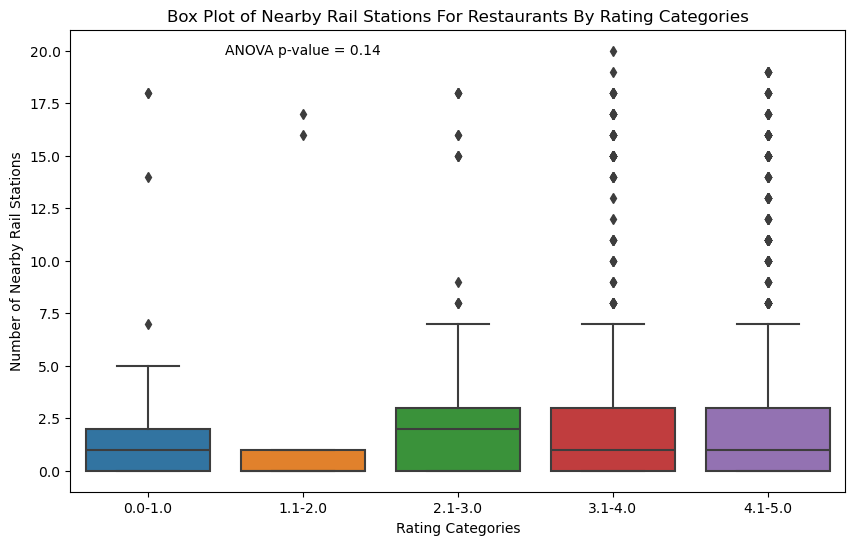

In [158]:
# Assuming your DataFrame is called bars_and_restaurants_df_no_duplicates_utf8
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Rating Categories', y='Nearby_Rail_Stations', data=restaurants_in_montreal_collected_unique_utf8)
plt.title('Box Plot of Nearby Rail Stations For Restaurants By Rating Categories')
plt.xlabel('Rating Categories')
plt.ylabel('Number of Nearby Rail Stations')

# First, group the data by 'Rating Categories' and create a list of 'Nearby_Stations' for each category
groups = restaurants_in_montreal_collected_unique_utf8.groupby('Rating Categories')['Nearby_Rail_Stations'].apply(list)

# Perform ANOVA using the f_oneway function
f_statistic, p_value = f_oneway(*groups)

# Define x and y coordinates for the text position
x_position = max(ax.get_xlim()) / 4.5
y_position = max(ax.get_ylim()) * 0.97


plt.text(x_position, y_position, f'ANOVA p-value = {p_value:.2g}', ha='center', va='top')

plt.savefig('Box Plots Of Nearby Rail Counts For Restaurants By Rating Categories.png', bbox_inches='tight')
plt.savefig('Box Plots Of Nearby Rail Counts For Restaurants By Rating Categories.jpg', bbox_inches='tight')

plt.show()

c:\Users\Laven\anaconda3\envs\lh_labs\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Laven\AppData\Local\Temp\ipykernel_30020\3610346055.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = restaurants_in_montreal_pricecat.groupby('Price Level Category')['Nearby_Stations'].apply(list)


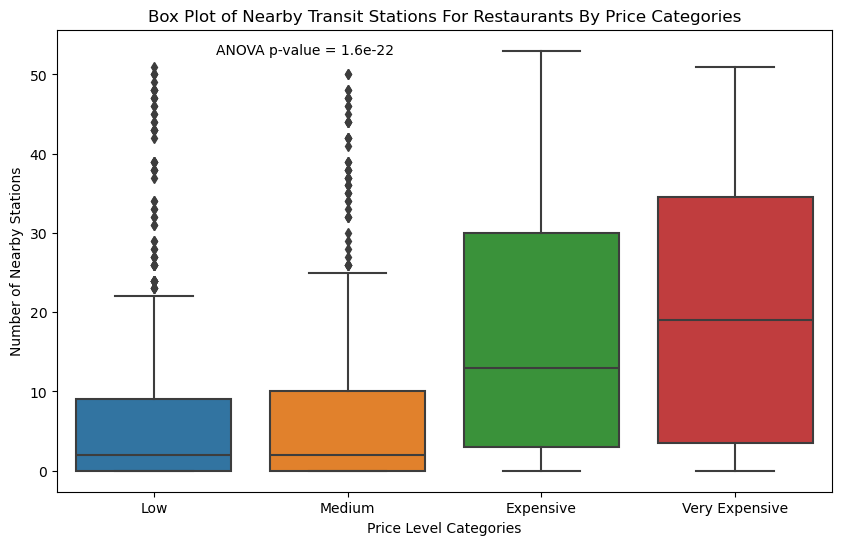

In [171]:
# Assuming your DataFrame is called bars_and_restaurants_df_no_duplicates_utf8
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Price Level Category', y='Nearby_Stations', data=restaurants_in_montreal_pricecat)
plt.title('Box Plot of Nearby Transit Stations For Restaurants By Price Categories')
plt.xlabel('Price Level Categories')
plt.ylabel('Number of Nearby Stations')

# First, group the data by 'Rating Categories' and create a list of 'Nearby_Stations' for each category
groups = restaurants_in_montreal_pricecat.groupby('Price Level Category')['Nearby_Stations'].apply(list)

# Perform ANOVA using the f_oneway function
f_statistic, p_value = f_oneway(*groups)

# Define x and y coordinates for the text position
x_position = max(ax.get_xlim()) / 4.5
y_position = max(ax.get_ylim()) * 0.97


plt.text(x_position, y_position, f'ANOVA p-value = {p_value:.2g}', ha='center', va='top')

plt.savefig('Box Plots of Nearby Station Counts for Restaurants By Price Category.png', bbox_inches='tight')
plt.savefig('Box Plots of Nearby Station Counts for Restaurants By Price Category.jpg', bbox_inches='tight')

plt.show()

c:\Users\Laven\anaconda3\envs\lh_labs\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Laven\AppData\Local\Temp\ipykernel_30020\3939181735.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = restaurants_in_montreal_pricecat.groupby('Price Level Category')['Nearby_Rail_Stations'].apply(list)


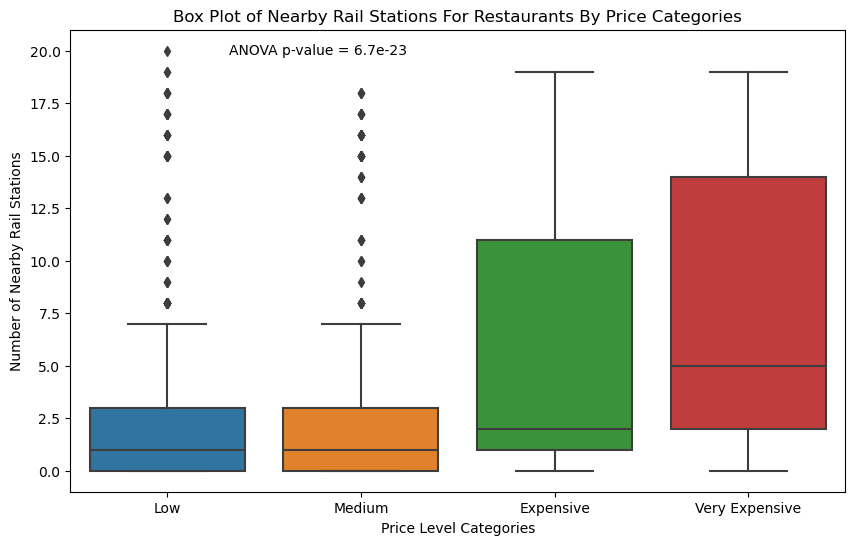

In [172]:
# Assuming your DataFrame is called bars_and_restaurants_df_no_duplicates_utf8
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Price Level Category', y='Nearby_Rail_Stations', data=restaurants_in_montreal_pricecat)
plt.title('Box Plot of Nearby Rail Stations For Restaurants By Price Categories')
plt.xlabel('Price Level Categories')
plt.ylabel('Number of Nearby Rail Stations')

# First, group the data by 'Rating Categories' and create a list of 'Nearby_Stations' for each category
groups = restaurants_in_montreal_pricecat.groupby('Price Level Category')['Nearby_Rail_Stations'].apply(list)

# Perform ANOVA using the f_oneway function
f_statistic, p_value = f_oneway(*groups)

# Define x and y coordinates for the text position
x_position = max(ax.get_xlim()) / 4.5
y_position = max(ax.get_ylim()) * 0.97


plt.text(x_position, y_position, f'ANOVA p-value = {p_value:.2g}', ha='center', va='top')

plt.savefig('Box Plots of Nearby Rail Counts for Restaurants By Price Category.png', bbox_inches='tight')
plt.savefig('Box Plots of Nearby Rail Counts for Restaurants By Price Category.jpg', bbox_inches='tight')

plt.show()